In [33]:
# Mendel Blumberger
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Open file
c = pd.read_csv("covid.tsv", sep="\t")

In [2]:
c.head(10) # displays 10 columns

,neighborhood_municipality,individuals_tested,infections,reinfections,deaths,hospitalizations,tests,postives,ag_tests,positive_ag_tests,pcr_tests,positive_pcr_tests,update_date
0,Aleppo,1102,1557,34,15,19,4684,323,2374,96,2312,227,2022-04-04
1,Allegheny Center (Pittsburgh),1011,1181,80,5,14,2898,374,379,47,2520,327,2022-04-04
2,Allegheny West (Pittsburgh),349,392,61,0,5,1217,109,240,17,977,92,2022-04-04
3,Allentown (Pittsburgh),1489,2294,176,2,33,5212,617,1275,83,3934,534,2022-04-04
4,Arlington (Pittsburgh),1075,1736,216,9,29,4382,519,1050,105,3329,413,2022-04-04
5,Arlington Heights (Pittsburgh),148,149,11,3,3,551,42,90,10,461,32,2022-04-04
6,Aspinwall,2098,1965,66,1,11,6905,593,1610,146,5286,446,2022-04-04
7,Avalon,2997,4531,313,12,57,11200,1141,2503,240,8700,900,2022-04-04
8,Baldwin Borough,14391,23656,1482,72,294,50665,6448,13276,1623,37394,4812,2022-04-04
9,Baldwin Township,1353,1886,98,1,13,4191,607,1101,186,3092,418,2022-04-04


14.592760180995475

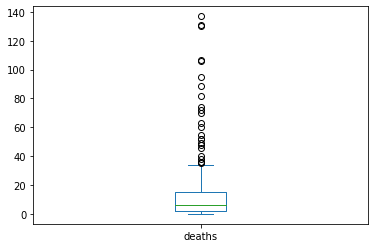

In [3]:
c["deaths"].plot.box() # Box and whisker plot of deaths

c['deaths'].mean() # Mean of deaths

# This graph tells us the average death count per neighborhood was 14.5 with a range of 5 - 20

59.09502262443439

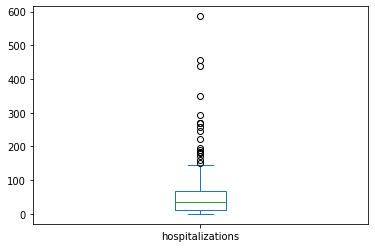

In [25]:
c["hospitalizations"].plot.box() # Box and whisker plot

c['hospitalizations'].mean() # Mean of hospitalizations

# This graph tells us the average hospitalization count per neighborhood was 59 with a range of 20 - 75

5630.3574660633485

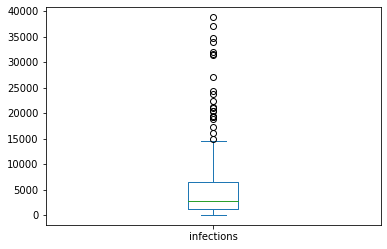

In [26]:
c["infections"].plot.box() # Box and whisker plot

c['infections'].mean() # Mean of infections

# This graph tells us the average infection count per neighborhood was 5630 with a range of 2000 - 7500

In [27]:
# Only displays infections column and ranks them by highest value to lowest
num_infections = c.groupby("neighborhood_municipality").sum()['infections']
num_infections.sort_values(ascending=False)

neighborhood_municipality
Penn Hills                38804
Ross                      37000
Monroeville               34812
Mount Lebanon             34005
Bethel Park               32045
                          ...  
Glenfield                   132
Chateau (Pittsburgh)         85
Haysville                    82
Trafford                     41
Undefined (Pittsburgh)       28
Name: infections, Length: 221, dtype: int64

In [28]:
# Only displays hospitalizations column and ranks them by highest value to lowest
num_hospitalizations = c.groupby("neighborhood_municipality").sum()['hospitalizations']
num_hospitalizations.sort_values(ascending=False)

neighborhood_municipality
Penn Hills                  586
Monroeville                 456
McKeesport                  439
Ross                        351
Baldwin Borough             294
                           ... 
Trafford                      0
Ben Avon Heights              0
South Shore (Pittsburgh)      0
Haysville                     0
Ridgemont (Pittsburgh)        0
Name: hospitalizations, Length: 221, dtype: int64

In [29]:
# Only displays deaths column and ranks them by highest value to lowest
num_deaths = c.groupby("neighborhood_municipality").sum()['deaths']
num_deaths.sort_values(ascending=False)

neighborhood_municipality
Ross                                      137
Monroeville                               131
McCandless                                130
Penn Hills                                107
McKeesport                                106
                                         ... 
Thornburg                                   0
Emsworth                                    0
Esplen (Pittsburgh)                         0
Central Business District (Pittsburgh)      0
Kilbuck                                     0
Name: deaths, Length: 221, dtype: int64

In [30]:
# Compute summary statistics on the numerical columns using pandas 
c.describe()

,individuals_tested,infections,reinfections,deaths,hospitalizations,tests,postives,ag_tests,positive_ag_tests,pcr_tests,positive_pcr_tests
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,4146.461538,5630.357466,386.140271,14.592760,59.095023,15064.190045,1450.257919,3757.805430,332.728507,11296.199095,1113.434389
std,5429.048641,7435.638097,563.579972,23.482813,79.020855,20605.615182,1811.663914,5860.115344,479.340189,15397.776118,1344.440547
min,27.000000,28.000000,0.000000,0.000000,0.000000,84.000000,9.000000,16.000000,0.000000,55.000000,4.000000
25%,944.000000,1181.000000,66.000000,2.000000,13.000000,3063.000000,334.000000,670.000000,59.000000,2312.000000,288.000000
50%,2102.000000,2687.000000,175.000000,6.000000,36.000000,7129.000000,774.000000,1632.000000,146.000000,5561.000000,619.000000
75%,5204.000000,6550.000000,449.000000,15.000000,67.000000,18085.000000,1770.000000,4016.000000,389.000000,13384.000000,1395.000000
max,35883.000000,38804.000000,3139.000000,137.000000,586.000000,129779.000000,10149.000000,33178.000000,2392.000000,97395.000000,7775.000000


In [31]:
df = pd.DataFrame(c) # make a data frame
df["result"] = df["tests"]/df["postives"] # divide tests by positives
print(df)

         neighborhood_municipality  individuals_tested  infections  \
0                           Aleppo                1102        1557   
1    Allegheny Center (Pittsburgh)                1011        1181   
2      Allegheny West (Pittsburgh)                 349         392   
3           Allentown (Pittsburgh)                1489        2294   
4           Arlington (Pittsburgh)                1075        1736   
..                             ...                 ...         ...   
216                      Whitehall               10686       19177   
217                        Wilkins                4176        5344   
218                    Wilkinsburg               10371       14323   
219                     Wilmerding                1055        1752   
220           Windgap (Pittsburgh)                 811        1071   

     reinfections  deaths  hospitalizations  tests  postives  ag_tests  \
0              34      15                19   4684       323      2374   
1          

In [32]:
df['result'].sort_values(ascending=True) # sort values from lowest positive rate to highest

109     5.501672
195     5.600000
205     5.890244
108     6.568726
176     6.607843
         ...    
135    24.020000
211    25.244939
82     26.809278
198    30.936591
183    39.657464
Name: result, Length: 221, dtype: float64

0. The lowest positives rates per neighborhood are:
1. Liberty: 5.5%
2. Thornburg: 5.6%
3. Versailles: 5.89%
4. Leetsdale: 6.57%
5. South Shore: 6.61%

0. The highest positive rates per neighorhood are:
1. Springdale Township: 39.66%
2. Turtle Creek: 30.94%
3. Glassport: 26.81%
4. West Mifflin: 25.24%
5. North Oakland: 24.02%